In [73]:
%reload_ext autoreload

In [74]:
%autoreload 2

In [75]:
from AccuracyMetrics import *
from BPCA import *
from Helpers import *
from KNN import *
from LR import *
from MCROC import *
from RF import *
from SVM import *

In [76]:
# take out the trash
import gc
import warnings
gc.collect()
warnings.filterwarnings('ignore')

# Python magic
%matplotlib inline

# Base packages
import gc, sys, re, os, math
from time import strptime, mktime

# Data processing/preprocessing/modeling packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)

# Sklearn: KNN, SVM, LR, RF
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import *
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import GridSearchCV

In [77]:
X_train2 = pd.read_csv('../data/1/TrainData2.txt', delimiter='\s+', header=None)
y_train2 = pd.read_csv('../data/1/TrainLabel2.txt', delimiter='\n', header=None)
X_test2 = pd.read_csv('../data/1/TestData2.txt', delimiter='\s+', header=None)

X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None)
y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)
X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter=',',   header=None)

X_train4 = pd.read_csv('../data/1/TrainData4.txt', delimiter='\s+', header=None)
y_train4 = pd.read_csv('../data/1/TrainLabel4.txt', delimiter='\n', header=None)
X_test4 = pd.read_csv('../data/1/TestData4.txt', delimiter='\s+', header=None)

X_train5 = pd.read_csv('../data/1/TrainData5.txt', delimiter='\s+', header=None)
y_train5 = pd.read_csv('../data/1/TrainLabel5.txt', delimiter='\n', header=None)
X_test5 = pd.read_csv('../data/1/TestData5.txt', delimiter='\s+', header=None)

X_train6 = pd.read_csv('../data/1/TrainData6.txt', delimiter='\s+', header=None)
y_train6 = pd.read_csv('../data/1/TrainLabel6.txt', delimiter='\n', header=None)
X_test6 = pd.read_csv('../data/1/TestData6.txt', delimiter='\s+', header=None)

X_training = [X_train2, X_train3, X_train4, X_train5, X_train6]
y_training = [y_train2, y_train3, y_train4, y_train5, y_train6]
X_testing = [X_test2, X_test3, X_test4, X_test5, X_test6]

for i,x in enumerate(X_training):
    print(f'X_TrainData{i+2} Shape: {x.shape}')

for i,y in enumerate(y_training):
    print(f'y_TrainData{i+2} Shape: {y.shape}')

for j,y in enumerate(X_testing):
    print(f'TestData{j+2} Shape: {y.shape}')

X_TrainData2 Shape: (100, 9182)
X_TrainData3 Shape: (6300, 13)
X_TrainData4 Shape: (2547, 112)
X_TrainData5 Shape: (1119, 11)
X_TrainData6 Shape: (612, 142)
y_TrainData2 Shape: (100, 1)
y_TrainData3 Shape: (6300, 1)
y_TrainData4 Shape: (2547, 1)
y_TrainData5 Shape: (1119, 1)
y_TrainData6 Shape: (612, 1)
TestData2 Shape: (74, 9182)
TestData3 Shape: (2693, 13)
TestData4 Shape: (1092, 112)
TestData5 Shape: (480, 11)
TestData6 Shape: (262, 142)


## Dataset 2

## PCA for DS2

In [78]:
printShapes(X_train2=X_train2.shape, y_train2=y_train2.shape, X_test2=X_test2.shape)

printHeads(X_train2=X_train2.head(), y_train2=y_train2.head())
           
printTails(y_train2=y_train2.tail())

X_train2 Shape: (100, 9182)

y_train2 Shape: (100, 1)

X_test2 Shape: (74, 9182)

X_train2 Head:        0         1         2         3         4        5         6     \
0  2.357935  1.505150  1.477121  1.301030  2.992995  1.30103  2.729974   
1  1.995635  1.633468  1.740363  1.819544  3.703377  1.30103  3.000434   
2  1.929419  1.301030  1.447158  1.301030  3.377852  1.30103  3.053463   
3  2.227887  1.602060  1.556302  1.908485  3.424392  1.30103  3.084219   
4  1.763428  1.623249  1.301030  2.029384  3.551694  1.30103  3.165541   

       7         8         9     ...      9172      9173      9174      9175  \
0  3.275542  3.531734  2.117271  ...  1.531479  1.792392  2.000000  1.477121   
1  3.118926  3.363424  1.568202  ...  1.755875  2.064458  1.431364  1.633468   
2  3.390405  3.359836  1.707570  ...  1.982271  2.198657  1.301030  1.707570   
3  3.288696  3.364176  1.301030  ...  1.792392  2.204120  1.633468  1.716003   
4  3.141450  3.495128  1.886491  ...  1.301030  1.785330  

In [80]:
X_train2_cmp, X_test2_cmp = trainPCA(X_train2, X_test2)

X_train Variance: 0.9287852222496773
X_train Shape: (100, 9182)
X_train Variance: 1.0
X_train Shape: (74, 74)


In [81]:
printShapes(X_train2_cmp=X_train2_cmp.shape, y_train2=y_train2.shape, X_test2_cmp=X_test2_cmp.shape)

X_train2_cmp Shape: (100, 74)

y_train2 Shape: (100, 1)

X_test2_cmp Shape: (74, 74)



### KNN for DS2

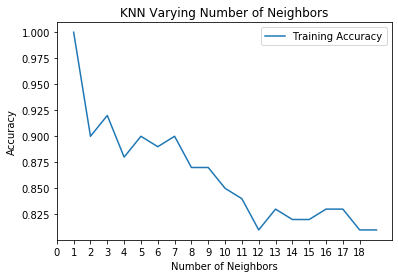

In [82]:
n_neighbors2, train_accuracy2 = testK(X_train2_cmp, y_train2)
plotTestK(n_neighbors2, train_accuracy2)

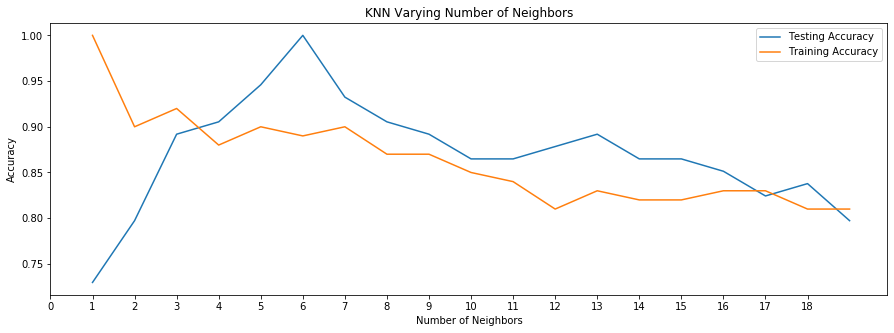

In [83]:
y_test2 = getTestLabelsKNN(6, X_train2_cmp, y_train2, X_test2_cmp)
n2, test_acc2, train_acc2 = optimizeK(X_train2_cmp, y_train2, X_test2_cmp, y_test2, 20)
plotK(n2, test_acc2, train_acc2, [15, 5])

In [84]:
n_neighbors2=10
knn_score2, knn_y_pred2 = runKNN(n_neighbors2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)
print(f'Accuracy: {knn_score2}')

Accuracy: 0.8648648648648649


In [85]:
knn_keys2, knn_vals2, knn_labels2 = countUniqueValues(knn_y_pred2)

Keys: dict_keys([2, 1, 6, 5, 11, 3, 4, 8])
Values: dict_values([3, 20, 26, 1, 1, 5, 15, 3])
Labels: [2, 1, 6, 5, 11, 3, 4, 8]


In [86]:
getScoresKNN(n_neighbors2, y_test2, knn_y_pred2)
pd.crosstab(y_test2, knn_y_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

KNN Accuracy Score, k=10: 0.8648648648648649

KNN Confusion Matrix, k=10

[[15  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 3  0  1 15  0  1  0  0  0]
 [ 0  0  0  0  1  1  0  0  0]
 [ 0  0  0  0  0 24  0  0  0]
 [ 2  1  0  0  0  0  3  0  0]
 [ 0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]

		  KNN Classification Report, k=10

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        15
           2       0.33      1.00      0.50         1
           3       0.80      1.00      0.89         4
           4       1.00      0.75      0.86        20
           5       1.00      0.50      0.67         2
           6       0.92      1.00      0.96        24
           8       1.00      0.50      0.67         6
           9       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         1

    accuracy                           0.86        74
   macro avg       0.

Predicted,1,2,3,4,5,6,8,11,All
True,,,,,,,,,
1,15,0,0,0,0,0,0,0,15
2,0,1,0,0,0,0,0,0,1
3,0,0,4,0,0,0,0,0,4
4,3,0,1,15,0,1,0,0,20
5,0,0,0,0,1,1,0,0,2
6,0,0,0,0,0,24,0,0,24
8,2,1,0,0,0,0,3,0,6
9,0,1,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,1,1


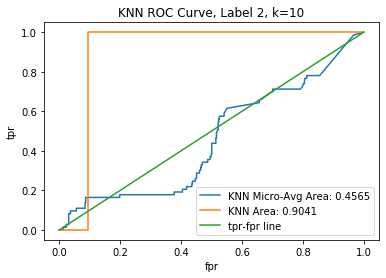

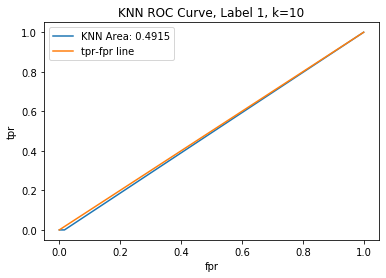

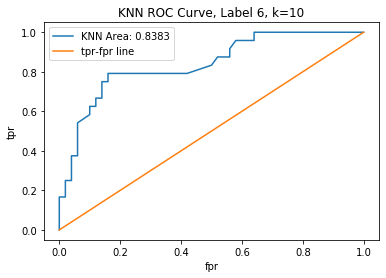

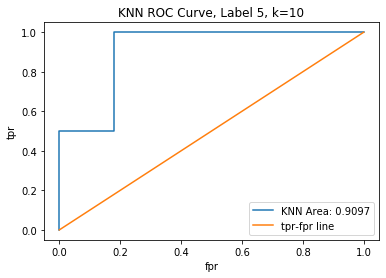

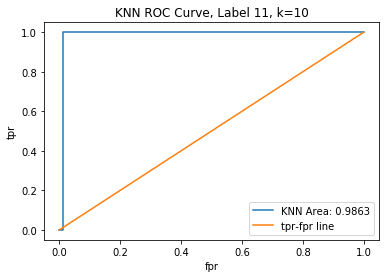

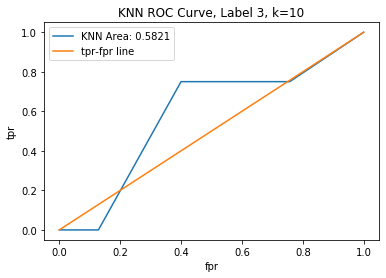

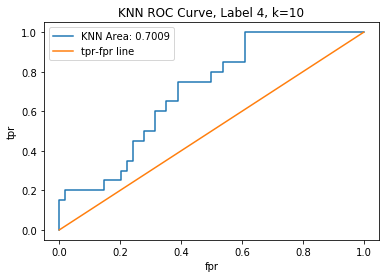

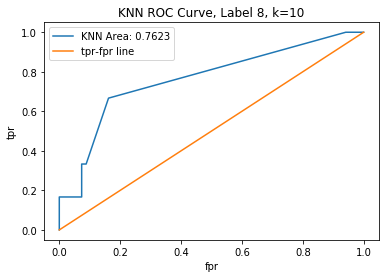

In [165]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, y_test2, model='KNN', tuner='k',\
 tuner_val=n_neighbors2, labels=knn_labels2, dec=False)

__________________________________________________________________________________________________________________________________________________

### Logistic Regression for DS2

In [88]:
c2 = 10
lr_cma2, lr_cr2, lr_acc2, lr_y_pred2, ky2, val2 = runLogisticRegression(c2, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

print(f'Logistic Regression Highest Accuracy Score, c={ky2}: {val2}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma2[ky2]}\n')
pd.crosstab(y_test2, lr_y_pred2[ky2], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, c=5: 0.5405405405405406

Logistic Regression Most Accurate Confusion Matrix

[[ 8  0  0  0  2  0  0  1  0  3  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  1  1  0  0]
 [ 0  0  1 11  3  0  0  0  3  2  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  2  0  2 12  2  0  1  1  3]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]



Predicted,1,2,3,4,5,6,7,8,9,10,11,All
True,,,,,,,,,,,,
1,8,0,0,0,2,0,0,1,0,3,1,15
2,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0,2,0,0,0,0,1,1,0,0,4
4,0,0,1,11,3,0,0,0,3,2,0,20
5,0,1,0,0,1,0,0,0,0,0,0,2
6,0,1,2,0,2,12,2,0,1,1,3,24
8,0,0,0,0,0,0,0,4,0,1,1,6
9,0,1,0,0,0,0,0,0,0,0,0,1
11,0,0,0,0,0,0,0,0,0,0,1,1


In [89]:
print(f'\n\t   Logistic Regression Classification Report C={ky2}\n\n{lr_cr2[ky2]}')


	   Logistic Regression Classification Report C=5

              precision    recall  f1-score   support

           1       1.00      0.53      0.70        15
           2       0.25      1.00      0.40         1
           3       0.40      0.50      0.44         4
           4       1.00      0.55      0.71        20
           5       0.12      0.50      0.20         2
           6       1.00      0.50      0.67        24
           7       0.00      0.00      0.00         0
           8       0.67      0.67      0.67         6
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          11       0.17      1.00      0.29         1

    accuracy                           0.54        74
   macro avg       0.42      0.48      0.37        74
weighted avg       0.88      0.54      0.64        74



In [90]:
lr_keys2, lr_vals2, lr_labels2 = countUniqueValues(lr_y_pred2)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Values: dict_values([array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3,  3,  6,  6,  6, 11,  6, 11, 11,  6,
        2,  3, 10, 10,  2,  6]), array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3,  3,  6,  6,  6, 11,  6, 11, 11,  6,
        2,  3, 10, 10,  2,  6]), array([ 2, 10,  2,  9,  6,  5,  3,  6,  8, 11,  9, 10,  3,  8,  5,  5,  9,
        4,  6,  5,  8,  8,  5, 11,  1,  1,  1,  1,  1,  1,  5,  1,  6, 10,
       10,  5,  5,  8,  5,  7,  7,  6, 11,  8,  6,  9,  4,  4,  7, 10,  4,
        4,  4,  4,  4,  4,  4,  4,  3, 

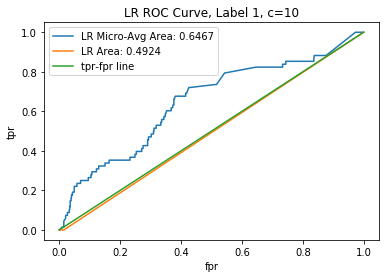

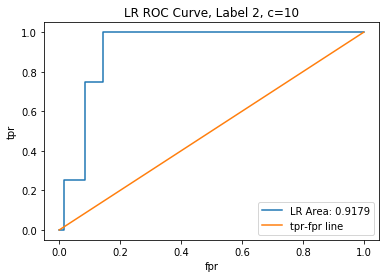

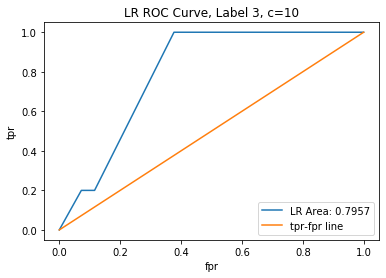

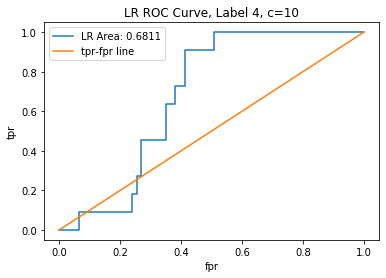

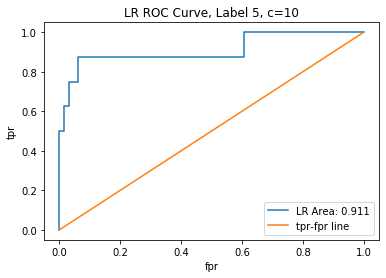

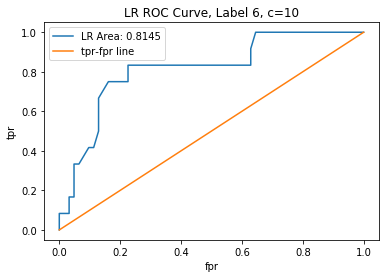

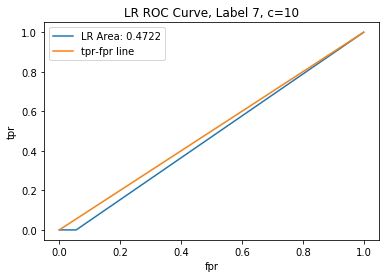

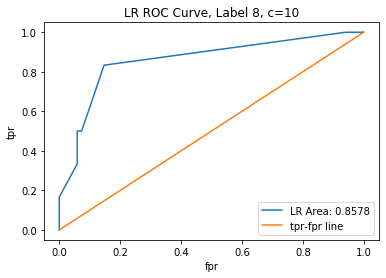

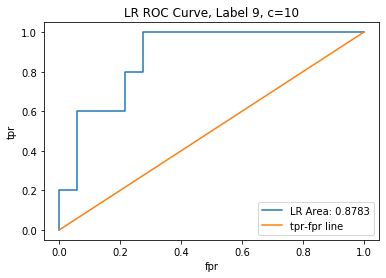

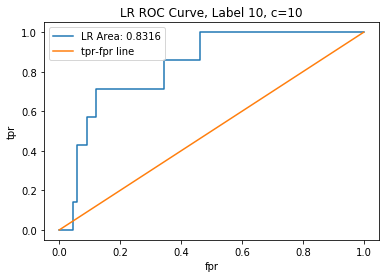

In [164]:
calcMultiClassROCAUC(X_train2_cmp, y_train2, X_test2_cmp, lr_y_pred2[ky2], model='LR',\
                     tuner='c', tuner_val=c2, labels=lr_labels2, dec=False)

## Random Forest for DS2

Keys: dict_keys([2, 10, 5, 3, 6, 4, 8, 11, 7, 1, 9])
Values: dict_values([6, 3, 13, 14, 12, 10, 4, 4, 2, 5, 1])
Labels: [2, 10, 5, 3, 6, 4, 8, 11, 7, 1, 9]

Random Forest Accuracy Score: 0.4189189189189189

Random Forest Confusion Matrix

[[ 5  0  3  0  4  0  1  0  0  1  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  1  0  0  0  0  1  0]
 [ 0  4  3  7  4  1  0  0  1  0  0]
 [ 0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  4  3  2 10  1  1  0  1  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  1  0  3  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       1.00      0.33      0.50        15
           2       0.17      1.00      0.29         1
           3       0.14      0.50      0.22         4
           4       0.70      0.35      0.47        20
           5       0.15      1.00      0.27         

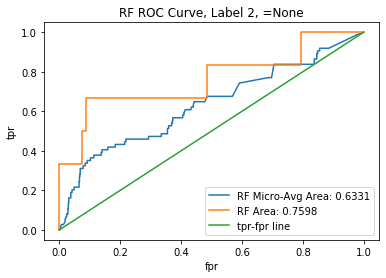

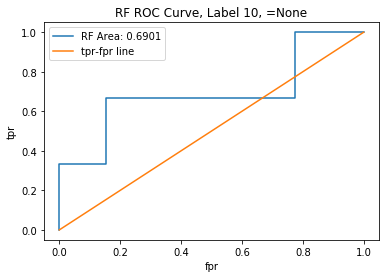

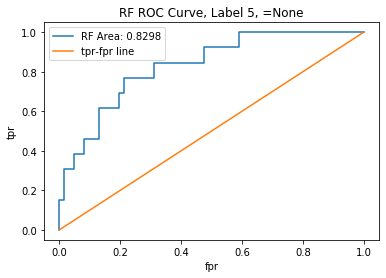

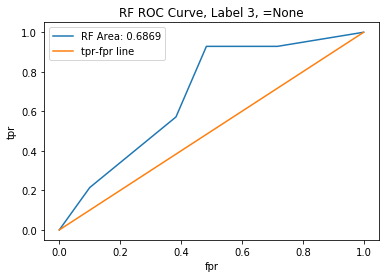

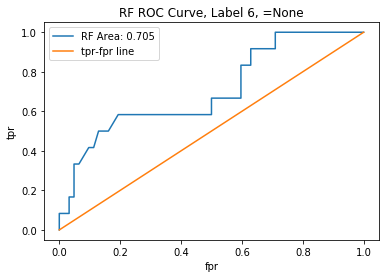

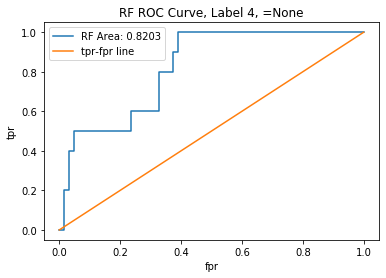

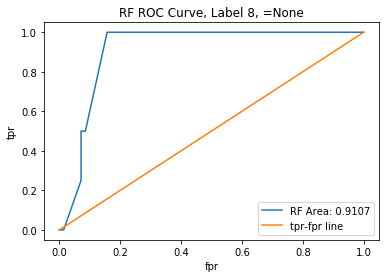

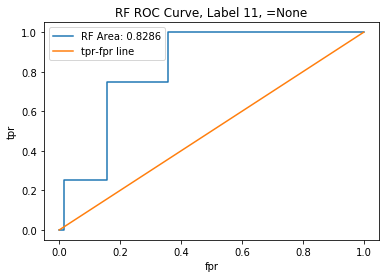

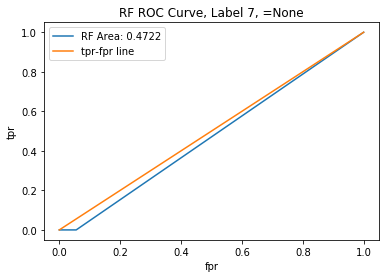

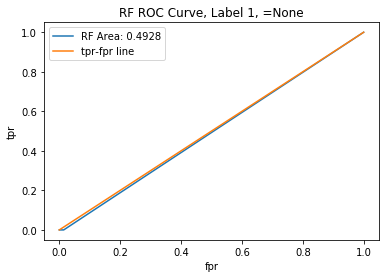

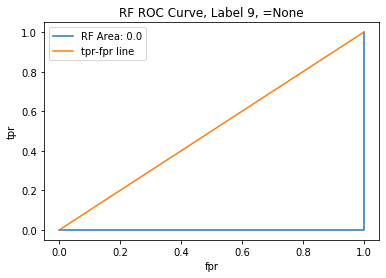

In [163]:
runRandomForest(X_train2_cmp, y_train2, X_test2_cmp, y_test2)

## SVM for DS2

SVM linear Kernel results
_________________________________________
Keys: dict_keys([2, 10, 9, 6, 5, 8, 11, 3, 4, 1, 7])
Values: dict_values([8, 9, 2, 13, 9, 6, 3, 8, 11, 4, 1])
Labels: [2, 10, 9, 6, 5, 8, 11, 3, 4, 1, 7]

SVM linear Kernel Accuracy Score: 0.5135135135135135

SVM linear Kernel Confusion Matrix

[[ 4  0  2  0  3  0  0  1  0  4  1]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  2 11  3  0  1  1  1  1  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  5  1  0  2 13  0  0  0  2  1]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.27      0.42        15
           2       0.12      1.00      0.22         1
           3       0.38      0.75      0.50         4
           4       1.00 

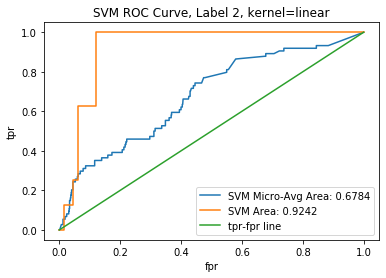

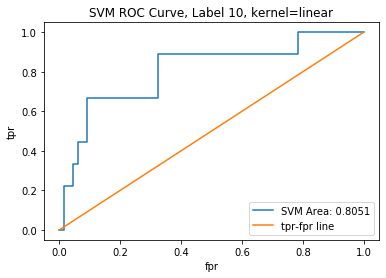

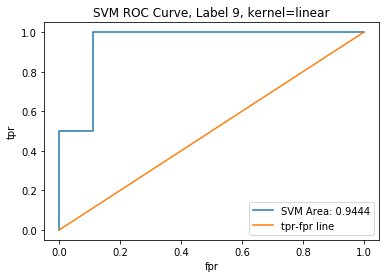

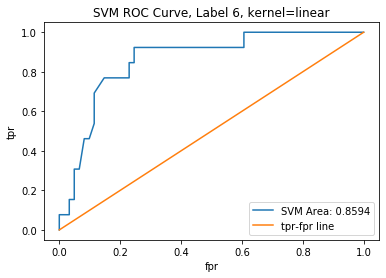

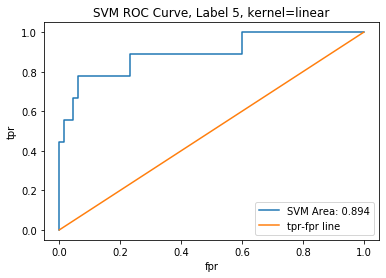

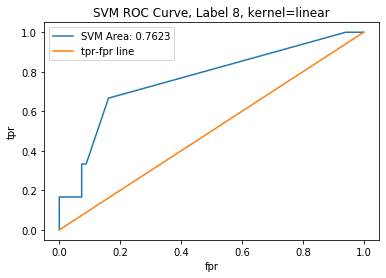

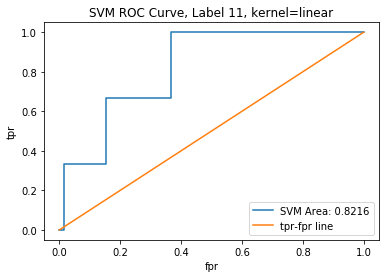

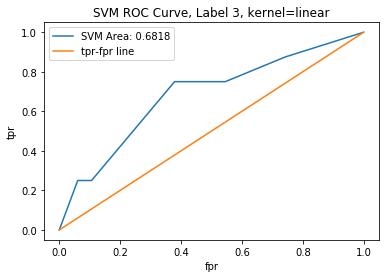

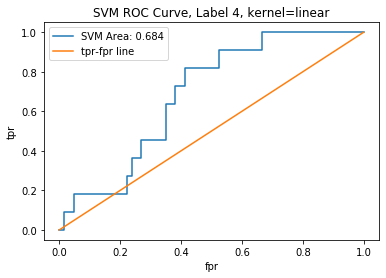

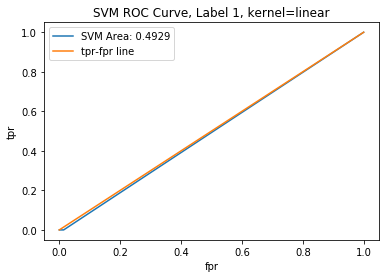

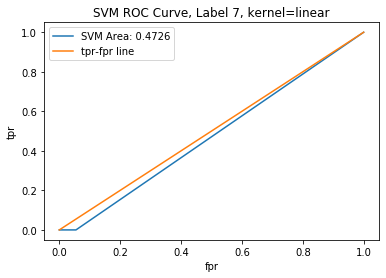

SVM poly Kernel results
_________________________________________
Keys: dict_keys([3, 5, 11, 4])
Values: dict_values([71, 1, 1, 1])
Labels: [3, 5, 11, 4]

SVM poly Kernel Accuracy Score: 0.0945945945945946

SVM poly Kernel Confusion Matrix

[[ 0  0 15  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0]
 [ 0  0 19  1  0  0  0  0  0]
 [ 0  0  1  0  1  0  0  0  0]
 [ 0  0 24  0  0  0  0  0  0]
 [ 0  0  6  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1
           3       0.06      1.00      0.11         4
           4       1.00      0.05      0.10        20
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00        24
           8       0.00      0.00      0.00         6
        

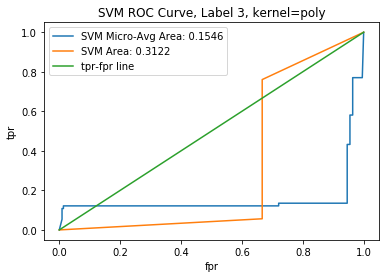

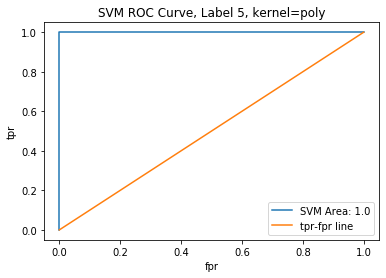

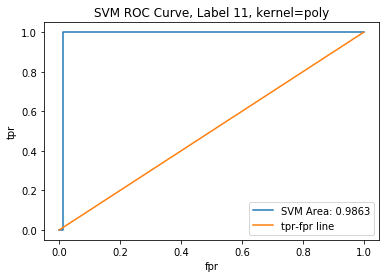

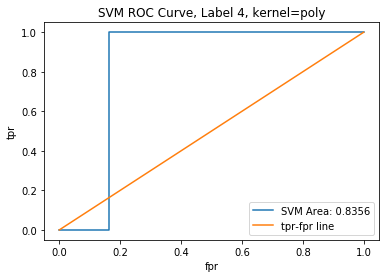

SVM rbf Kernel results
_________________________________________
Keys: dict_keys([2, 10, 5, 3, 6, 8, 11, 4])
Values: dict_values([3, 15, 13, 18, 4, 7, 4, 10])
Labels: [2, 10, 5, 3, 6, 8, 11, 4]

SVM rbf Kernel Accuracy Score: 0.33783783783783783

SVM rbf Kernel Confusion Matrix

[[ 0  0  7  0  3  0  0  0  4  1]
 [ 0  0  0  0  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0  0  0]
 [ 0  0  4 10  5  0  0  0  1  0]
 [ 0  0  0  0  2  0  0  0  0  0]
 [ 0  2  3  0  3  4  3  0  8  1]
 [ 0  0  0  0  0  0  4  0  2  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.00      0.00      0.00         1
           3       0.22      1.00      0.36         4
           4       1.00      0.50      0.67        20
           5       0.15      1.00      0.27         2
           6      

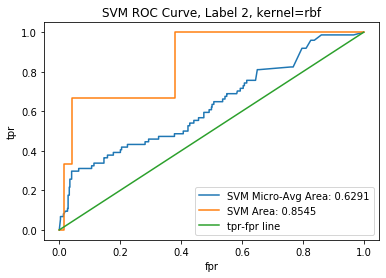

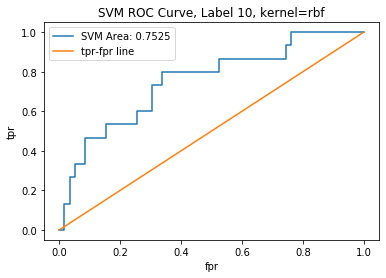

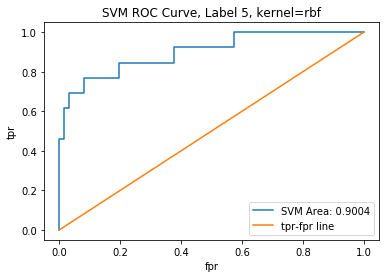

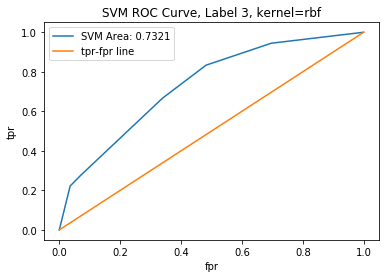

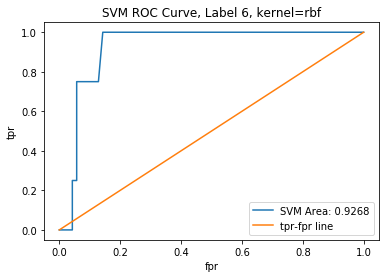

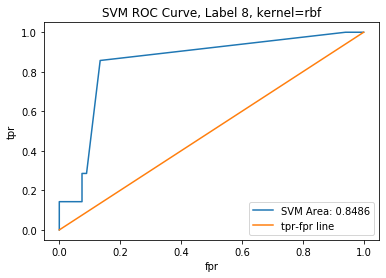

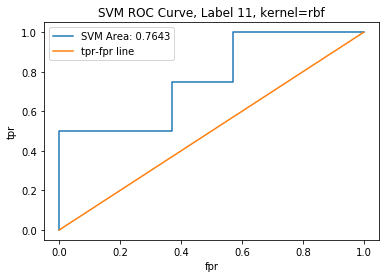

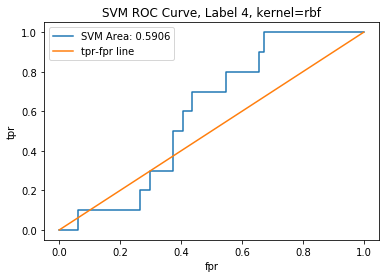

SVM sigmoid Kernel results
_________________________________________
Keys: dict_keys([9, 10, 2, 3, 6, 5, 8, 11, 4, 1, 7])
Values: dict_values([2, 9, 2, 8, 12, 11, 5, 5, 11, 6, 3])
Labels: [9, 10, 2, 3, 6, 5, 8, 11, 4, 1, 7]

SVM sigmoid Kernel Accuracy Score: 0.527027027027027

SVM sigmoid Kernel Confusion Matrix

[[ 6  0  1  0  3  0  0  1  0  3  1]
 [ 0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  3  0  0  0  0  0  1  0  0]
 [ 0  0  3 11  5  0  1  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0]
 [ 0  1  1  0  2 12  2  0  0  4  2]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  4  0  2  0]
 [ 0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       1.00      0.40      0.57        15
           2       0.00      0.00      0.00         1
           3       0.38      0.75      0.50         4
           4       1

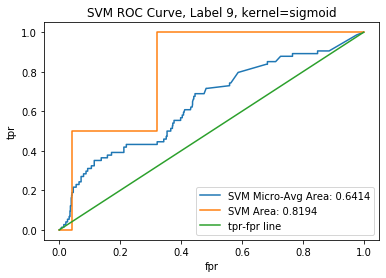

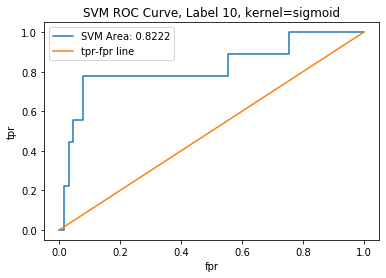

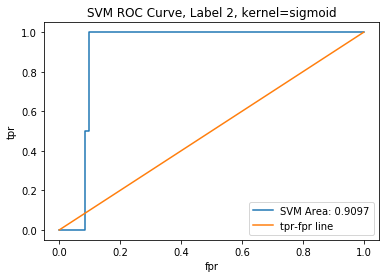

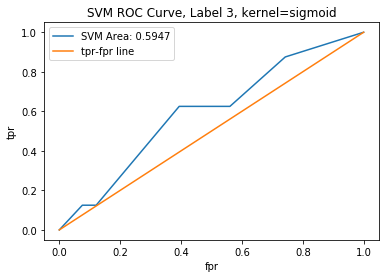

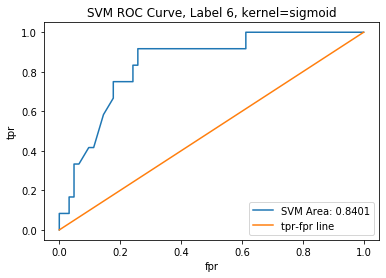

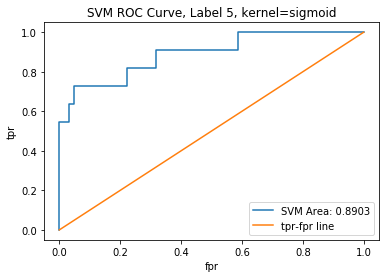

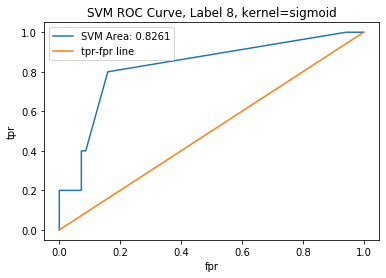

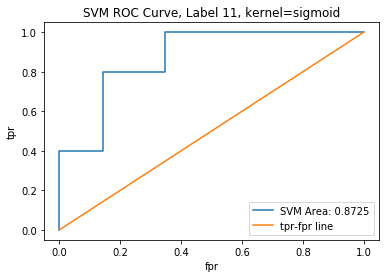

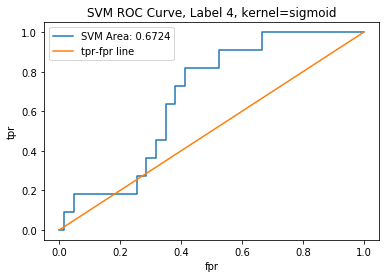

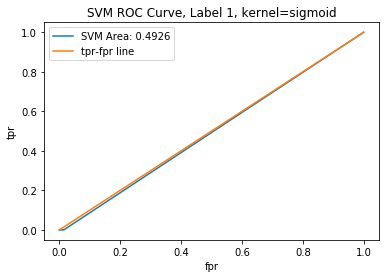

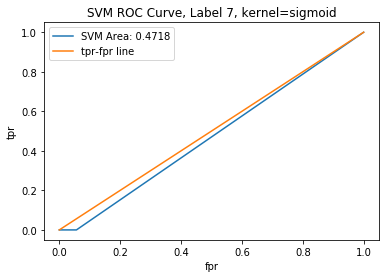

In [162]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train2_cmp, y_train2, X_test2_cmp, y_test2)

# Dataset 3

In [123]:
X_train3 = pd.read_csv('../data/1/TrainData3.txt', delimiter='\s+', header=None) # y_train3 = pd.read_csv('../data/1/TrainLabel3.txt', delimiter='\n', header=None)# X_test3 = pd.read_csv('../data/1/TestData3.txt', delimiter='\s+', header=None)

In [124]:
X_train3.shape

(6300, 13)

In [125]:
X_train3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2,1.0,5,4.0,5.0,5.0,3,3.0,0,1.0,1.0,7.0,1.000000e+99
1,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.000000e+00
2,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.000000e+00
3,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00
4,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.000000e+00


In [126]:
X_train3 = replaceWithNan(X_train3, 0, 12)

Bad Values 1.0000000000000001e+99 replaced with NaN.


In [127]:
# best results at 30
X_train3 = runFastKNN(X_train3, 30)

Running fast_knn, k=30.


## KNN for DS3

In [128]:
X_test3.shape

(2693, 13)

In [129]:
printHeads(y_train3=y_train3.head(), y_test3=X_test3.head())

y_train3 Head:    0
0  9
1  9
2  9
3  1
4  1

y_test3 Head:    0   1   2   3   4   5   6   7   8   9   10  11  12
0   1   5   3   4   1   5   1   3   0   1   1   7   1
1   2   1   4   3   5   5   3   2   0   1   1   7   1
2   1   5   2   3   9   2   1   4   1   3   1   7   1
3   1   2   2   2   3   2   1   4   2   3   3   7   1
4   2   5   3   4   1   2   1   1   0   2   2   7   1



In [130]:
y_train3.tail()

,0
6295,7
6296,9
6297,5
6298,9
6299,8


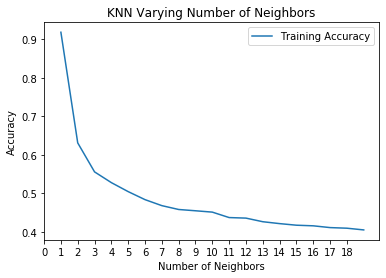

In [131]:
neighbors3, train_accuracy3 = testK(X_train3, y_train3)
plotTestK(neighbors3, train_accuracy3)

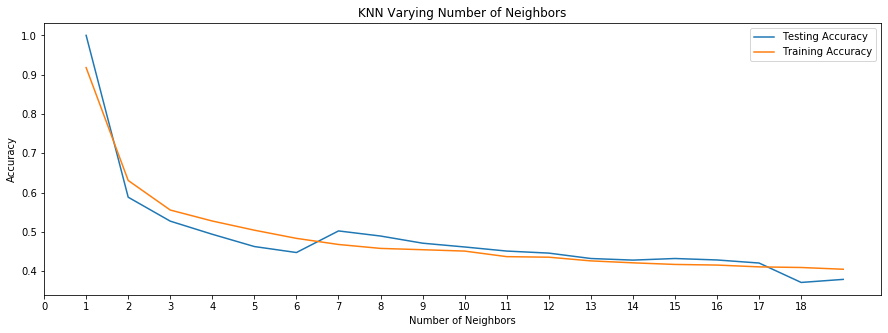

In [132]:
y_test3 = getTestLabelsKNN(1, X_train3, y_train3, X_test3)
n3, test_acc3, train_acc3 = optimizeK(X_train3, y_train3, X_test3, y_test3, 20)
plotK(n3, test_acc3, train_acc3, [15, 5])

In [157]:
n_neighbors3=9
knn_score3, knn_y_pred3 = runKNN(n_neighbors3, X_train3, y_train3, X_test3, y_test3)
print(f'Accuracy: {knn_score3}')

Accuracy: 0.4712216858522094


In [158]:
knn_keys3, knn_vals3, knn_labels3 = countUniqueValues(knn_y_pred3)

Keys: dict_keys([8, 9, 1, 5, 2, 7, 6, 3, 4])
Values: dict_values([344, 178, 782, 158, 368, 189, 296, 172, 206])
Labels: [8, 9, 1, 5, 2, 7, 6, 3, 4]


KNN Accuracy Score, k=9: 0.4712216858522094

KNN Confusion Matrix, k=9

[[412  24  17  14   4   3   3   1   3]
 [ 38 263  14  14   7  50   5  10   2]
 [ 27  20  62  11   6  16  10  11   0]
 [100  16  27  74  24  24   8  14   4]
 [ 91  23  14  17  48  28   8  13   5]
 [ 26   9  16  18  19  94  27  19  14]
 [ 20   5   9  27  22  35  69  41  17]
 [ 29   5   7  25  27  35  36 156  42]
 [ 39   3   6   6   1  11  23  79  91]]

		  KNN Classification Report, k=9

              precision    recall  f1-score   support

           1       0.53      0.86      0.65       481
           2       0.71      0.65      0.68       403
           3       0.36      0.38      0.37       163
           4       0.36      0.25      0.30       291
           5       0.30      0.19      0.24       247
           6       0.32      0.39      0.35       242
           7       0.37      0.28      0.32       245
           8       0.45      0.43      0.44       362
           9       0.51      0.35      0.42       25

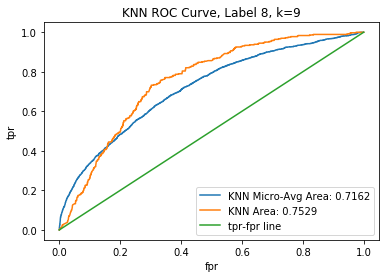

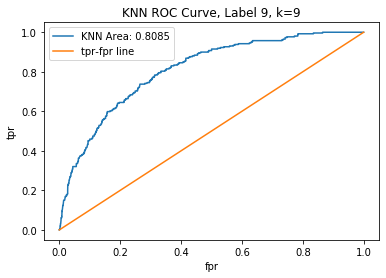

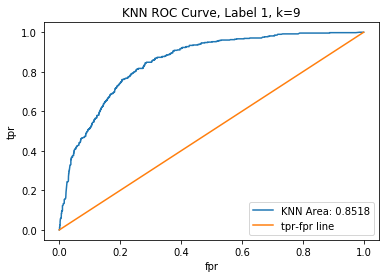

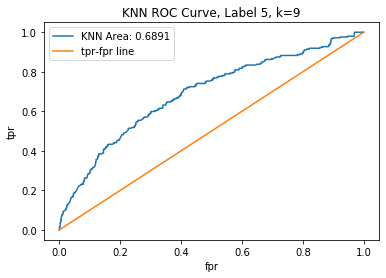

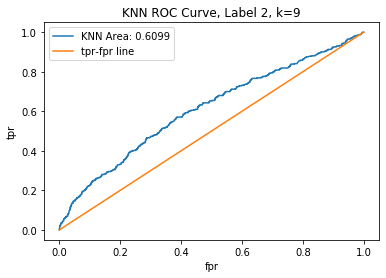

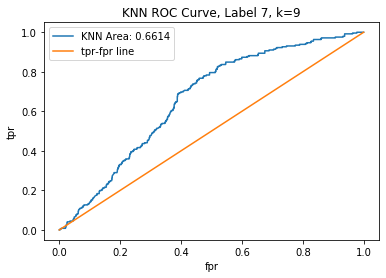

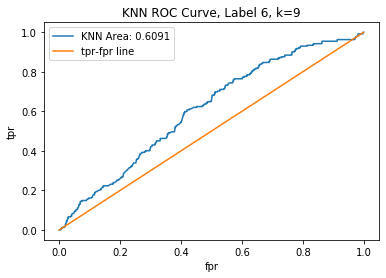

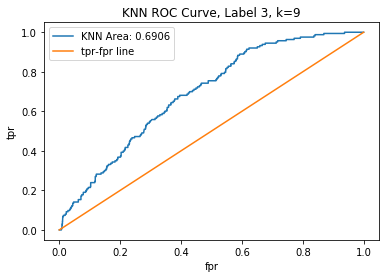

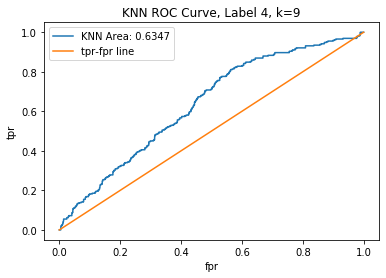

In [161]:
getScoresKNN(n_neighbors3, y_test3, knn_y_pred3)
pd.crosstab(y_test3, knn_y_pred3, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train3, y_train3, X_test3, y_test3, model='KNN', tuner='k',\
                     tuner_val=n_neighbors3, labels=knn_labels3, dec=False)

## LR for DS3

In [145]:
c3 = 20
lr_cma3, lr_cr3, lr_acc3, lr_y_pred3, ky3, val3 = runLogisticRegression(c3, X_train3, y_train3, X_test3, y_test3)
print(f'Logistic Regression Highest Accuracy Score, C={ky3}: {val3}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma3[ky3]}\n')
pd.crosstab(y_test3, lr_y_pred3[ky3], rownames=['True'], colnames=['Predicted'], margins=True)

Logistic Regression Highest Accuracy Score, C=15: 0.27255848496101004

Logistic Regression Most Accurate Confusion Matrix

[[406  13   0   6   1   8  20  10  17]
 [203   9   0   4   1  28 143  12   3]
 [ 65  10   1  14   0  30  10  29   4]
 [100  61   1  25   1  35   8  42  18]
 [ 56   9   0  27   2  31   2  47  73]
 [ 38  15   0  12   4  48   8 103  14]
 [ 42   9   1  11   0  48   5 120   9]
 [ 67   2   1   9   2  49   6 187  39]
 [ 35   3   0   1   0  11   5 153  51]]



Predicted,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,
1,406,13,0,6,1,8,20,10,17,481
2,203,9,0,4,1,28,143,12,3,403
3,65,10,1,14,0,30,10,29,4,163
4,100,61,1,25,1,35,8,42,18,291
5,56,9,0,27,2,31,2,47,73,247
6,38,15,0,12,4,48,8,103,14,242
7,42,9,1,11,0,48,5,120,9,245
8,67,2,1,9,2,49,6,187,39,362
9,35,3,0,1,0,11,5,153,51,259


In [146]:
print(f'\n\t   Logistic Regression Classification Report C={ky3}\n\n{lr_cr3[ky3]}')


	   Logistic Regression Classification Report C=15

              precision    recall  f1-score   support

           1       0.40      0.84      0.54       481
           2       0.07      0.02      0.03       403
           3       0.25      0.01      0.01       163
           4       0.23      0.09      0.13       291
           5       0.18      0.01      0.02       247
           6       0.17      0.20      0.18       242
           7       0.02      0.02      0.02       245
           8       0.27      0.52      0.35       362
           9       0.22      0.20      0.21       259

    accuracy                           0.27      2693
   macro avg       0.20      0.21      0.17      2693
weighted avg       0.21      0.27      0.20      2693



In [141]:
lr_keys3, lr_vals3, lr_labels3 = countUniqueValues(lr_y_pred3)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Values: dict_values([array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4]), array([8, 8, 1, ..., 1, 6, 4])])
Labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


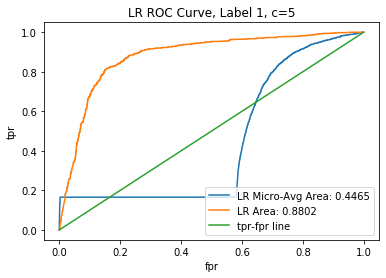

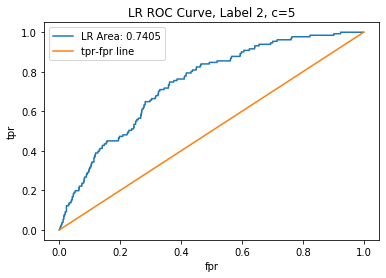

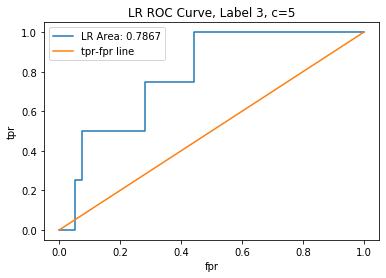

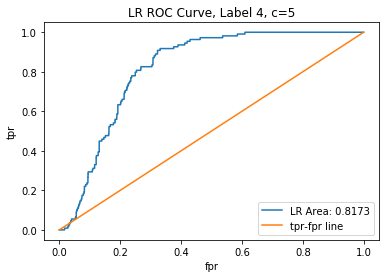

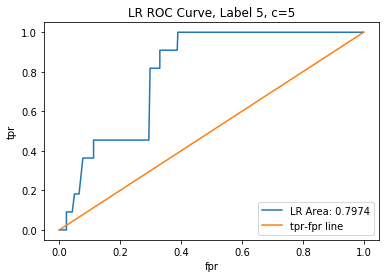

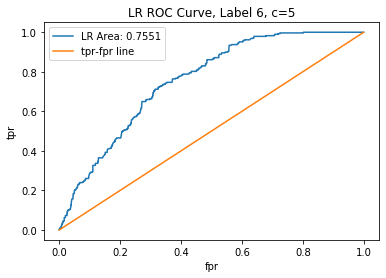

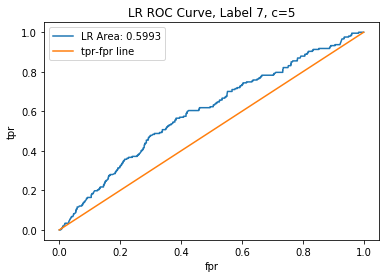

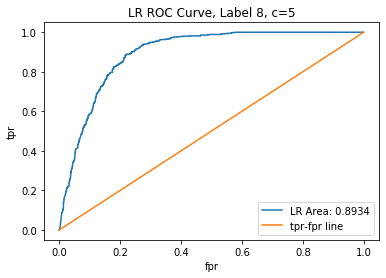

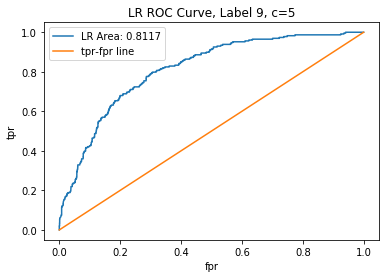

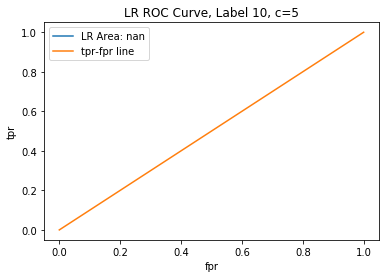

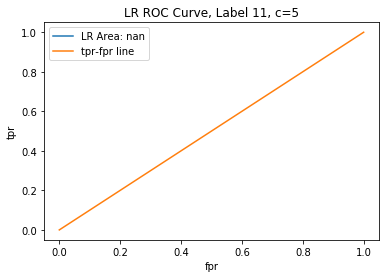

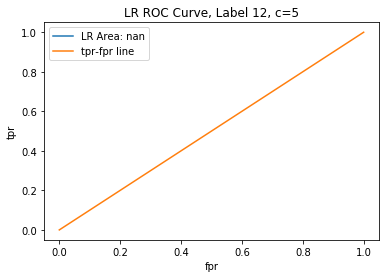

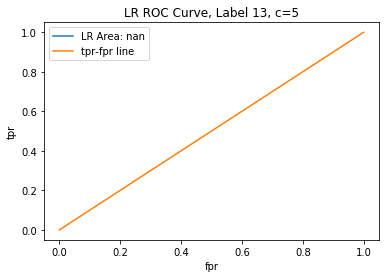

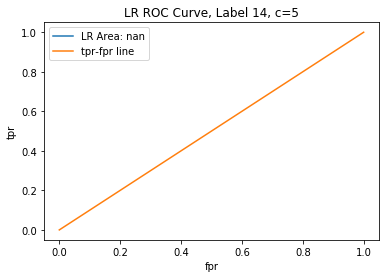

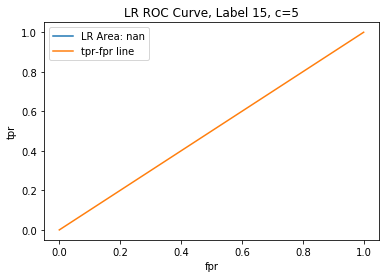

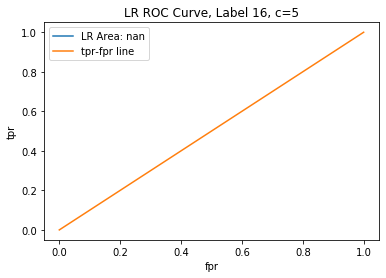

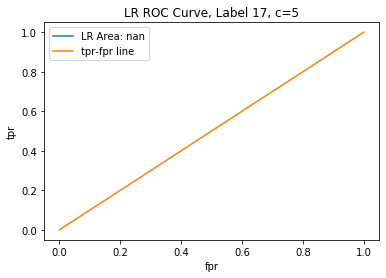

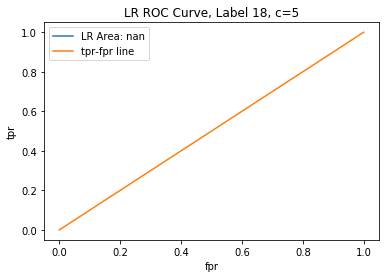

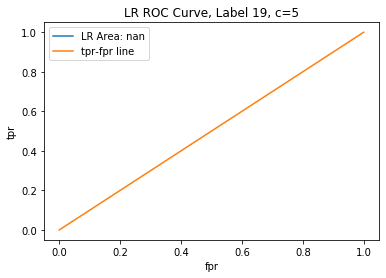

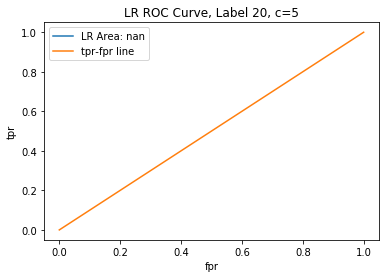

In [166]:
calcMultiClassROCAUC(X_train3, y_train3, X_test3, lr_y_pred3[ky3], model='LR', tuner='c', tuner_val=ky2, labels=lr_labels3, dec=False)

## Random Forest for DS3

Keys: dict_keys([7, 8, 1, 4, 9, 5, 6, 2, 3])
Values: dict_values([270, 420, 744, 209, 224, 153, 332, 192, 149])
Labels: [7, 8, 1, 4, 9, 5, 6, 2, 3]

Random Forest Accuracy Score: 0.4641663572224285

Random Forest Confusion Matrix

[[386  21  13  11   8   9  14  15   4]
 [107 101  19  36  18  34  29  44  15]
 [ 23  13  61  12   7  26   7  12   2]
 [ 67  20  18  86  17  26  19  29   9]
 [ 49  16  13  22  60  35  17  25  10]
 [ 30   7   8  15  15 110  28  20   9]
 [ 16   4   7   9  13  50 103  28  15]
 [ 25   7   9  18   9  26  39 206  23]
 [ 41   3   1   0   6  16  14  41 137]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.52      0.80      0.63       481
           2       0.53      0.25      0.34       403
           3       0.41      0.37      0.39       163
           4       0.41      0.30      0.34       291
           5       0.39      0.24      0.30       247
           6       0.33      0.45      0.38       2

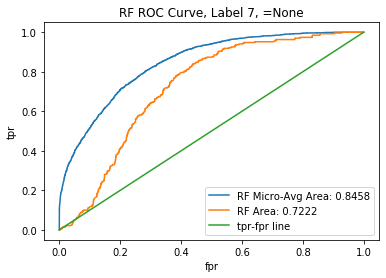

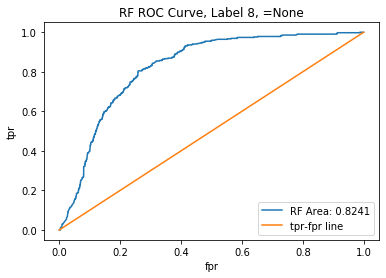

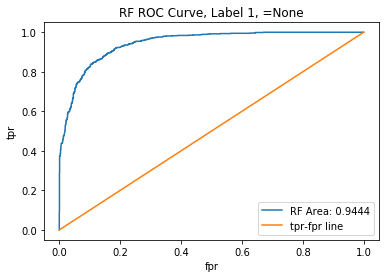

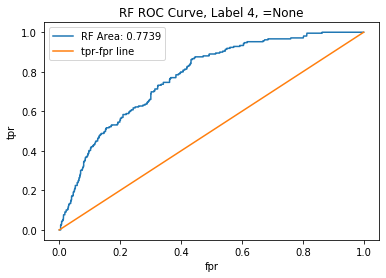

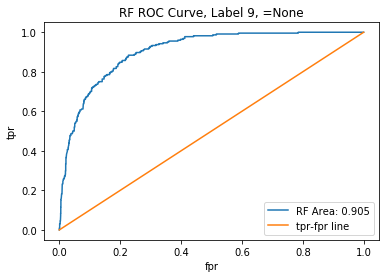

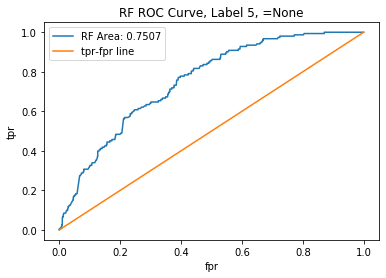

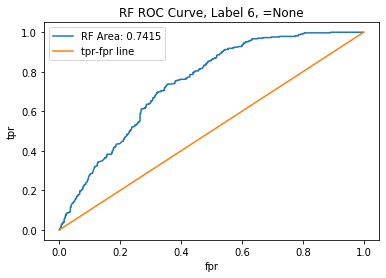

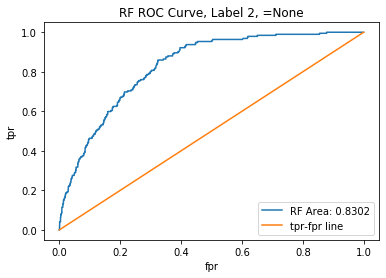

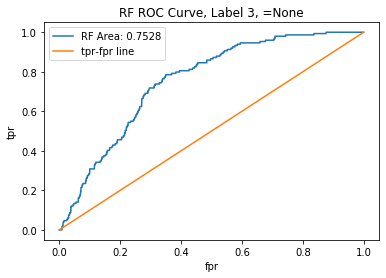

In [167]:
runRandomForest(X_train3, y_train3, X_test3, y_test3)

## SVM for DS3

SVM linear Kernel results
_________________________________________
Keys: dict_keys([8, 1, 4, 9, 6, 7, 2, 3])
Values: dict_values([730, 1038, 159, 117, 337, 240, 56, 16])
Labels: [8, 1, 4, 9, 6, 7, 2, 3]

SVM linear Kernel Accuracy Score: 0.2636464909023394

SVM linear Kernel Confusion Matrix

[[401  10   3  12   0  11  24  10  10]
 [190  14   1  12   0  27 145  14   0]
 [ 54   8   4  28   0  37  10  22   0]
 [148   9   4  28   0  42   9  44   7]
 [ 48   5   1  35   0  35   6  48  69]
 [ 43   5   0  19   0  58   8 101   8]
 [ 39   3   1  13   0  59  10 120   0]
 [ 64   2   2  11   0  55  16 192  20]
 [ 51   0   0   1   0  13  12 179   3]]


		    SVM linear Kernel Classification Report

              precision    recall  f1-score   support

           1       0.39      0.83      0.53       481
           2       0.25      0.03      0.06       403
           3       0.25      0.02      0.04       163
           4       0.18      0.10      0.12       291
           5       0.00      0.00

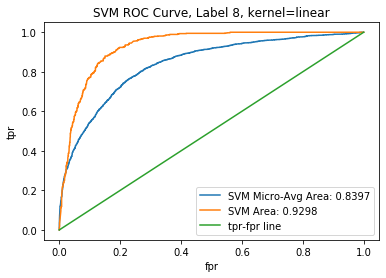

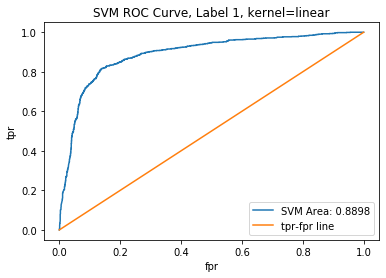

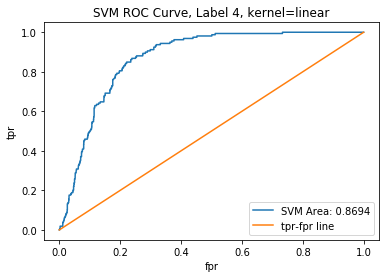

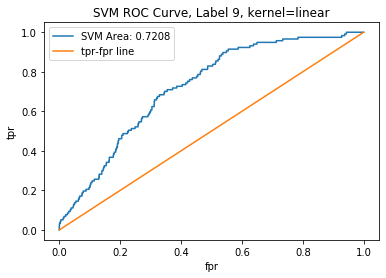

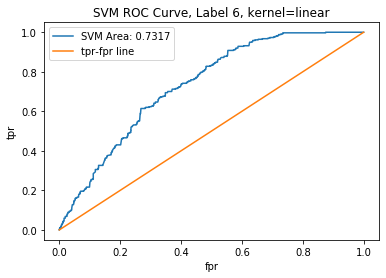

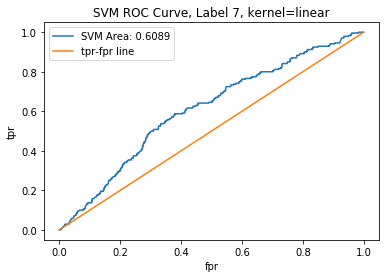

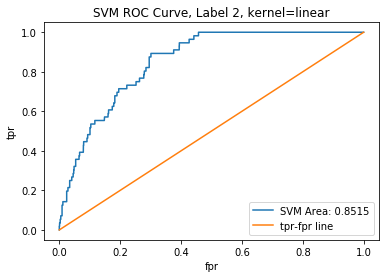

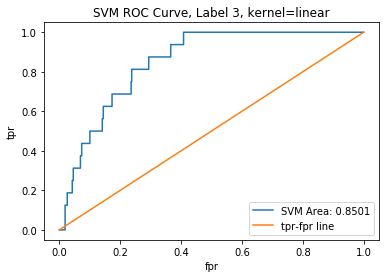

SVM poly Kernel results
_________________________________________
Keys: dict_keys([8, 1, 4, 2, 7, 9, 6, 3, 5])
Values: dict_values([431, 758, 143, 109, 128, 493, 438, 148, 45])
Labels: [8, 1, 4, 2, 7, 9, 6, 3, 5]

SVM poly Kernel Accuracy Score: 0.3070924619383587

SVM poly Kernel Confusion Matrix

[[375  17  32   9   1   8   7   9  23]
 [102  31  12  17   1  25   3   5 207]
 [ 42  18  18  19   8  36   9  10   3]
 [ 73  15   4  43   7  45  18  23  63]
 [ 24  13  69  27  16  54   8  27   9]
 [ 33   8   8  13   1  99  22  44  14]
 [ 26   3   1   6   7  83  24  69  26]
 [ 34   2   2   5   4  69  25 147  74]
 [ 49   2   2   4   0  19  12  97  74]]


		    SVM poly Kernel Classification Report

              precision    recall  f1-score   support

           1       0.49      0.78      0.61       481
           2       0.28      0.08      0.12       403
           3       0.12      0.11      0.12       163
           4       0.30      0.15      0.20       291
           5       0.36      0

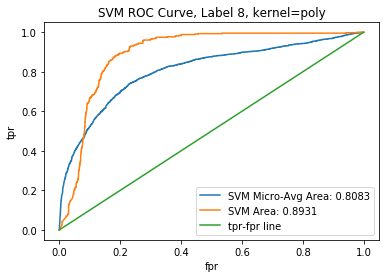

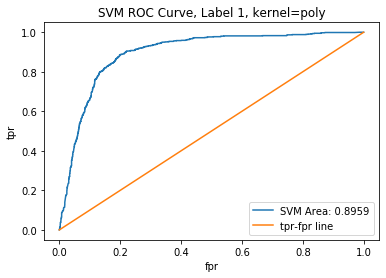

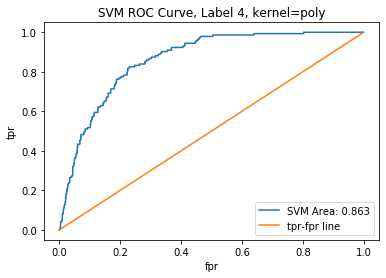

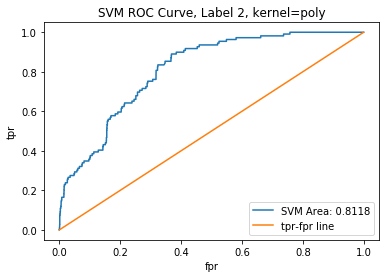

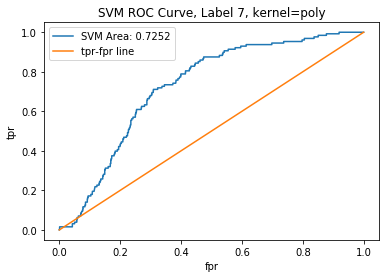

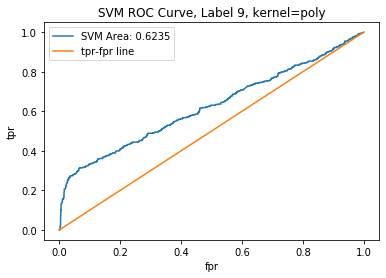

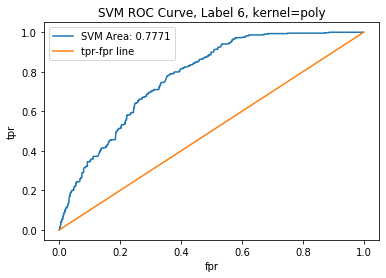

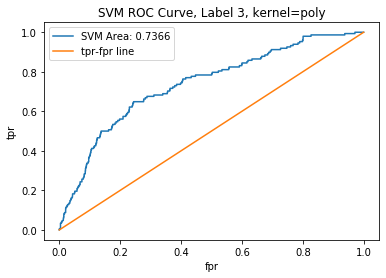

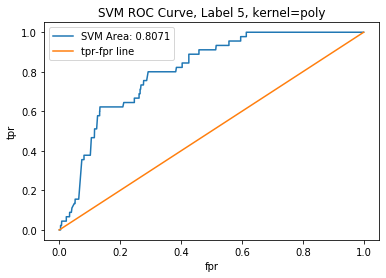

SVM rbf Kernel results
_________________________________________
Keys: dict_keys([8, 1, 6, 7, 9, 2, 4, 3, 5])
Values: dict_values([494, 1294, 437, 78, 108, 120, 146, 12, 4])
Labels: [8, 1, 6, 7, 9, 2, 4, 3, 5]

SVM rbf Kernel Accuracy Score: 0.31711845525436316

SVM rbf Kernel Confusion Matrix

[[434  19   1  12   0   7   5   3   0]
 [320  33   3  13   1  24   2   6   1]
 [ 43  25   6  22   2  41   6  18   0]
 [148  18   1  42   0  45  10  27   0]
 [113   6   0  28   0  71   5  23   1]
 [ 54   7   0  10   0  97  12  54   8]
 [ 41   6   0   9   1  74  14  92   8]
 [ 85   4   0   9   0  64  20 159  21]
 [ 56   2   1   1   0  14   4 112  69]]


		    SVM rbf Kernel Classification Report

              precision    recall  f1-score   support

           1       0.34      0.90      0.49       481
           2       0.28      0.08      0.13       403
           3       0.50      0.04      0.07       163
           4       0.29      0.14      0.19       291
           5       0.00      0.00  

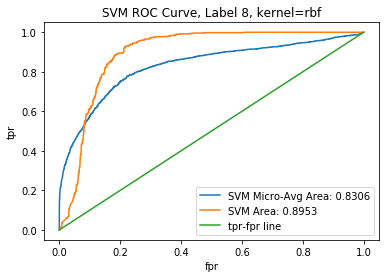

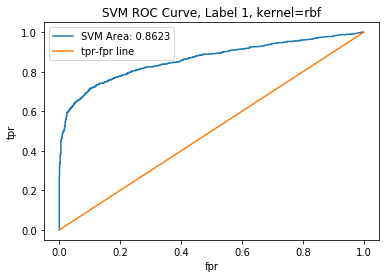

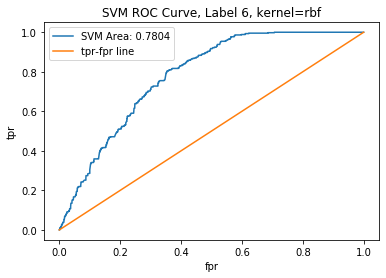

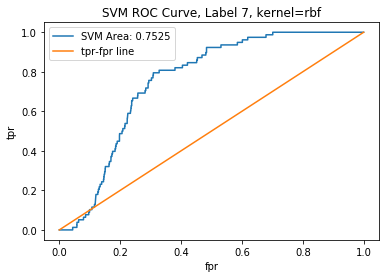

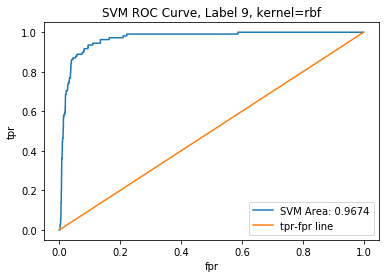

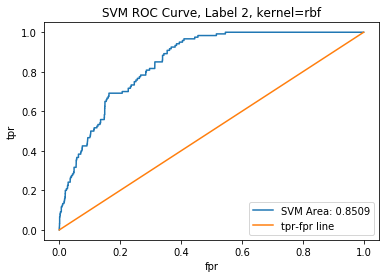

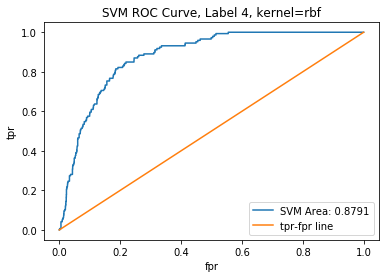

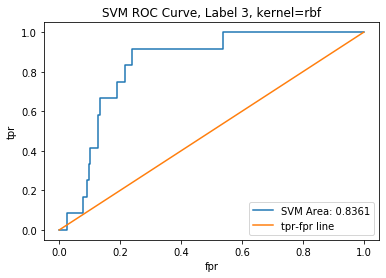

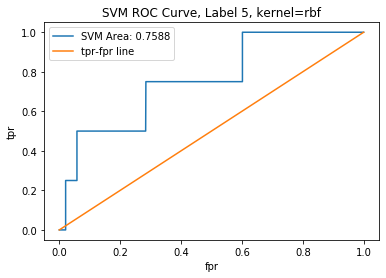

SVM sigmoid Kernel results
_________________________________________
Keys: dict_keys([1, 8, 2, 9, 4, 3, 6, 5])
Values: dict_values([1055, 331, 1203, 54, 32, 5, 12, 1])
Labels: [1, 8, 2, 9, 4, 3, 6, 5]

SVM sigmoid Kernel Accuracy Score: 0.2625324916450056

SVM sigmoid Kernel Confusion Matrix

[[286 193   0   0   0   0   0   2   0]
 [ 94 305   0   0   0   0   0   3   1]
 [100  51   1   2   0   0   0   9   0]
 [107 166   1   2   0   1   0  13   1]
 [ 85 133   1   2   0   0   0  25   1]
 [112  75   0   6   0   2   0  44   3]
 [ 96  82   0   3   0   3   0  56   5]
 [119 120   1  10   0   2   0  89  21]
 [ 56  78   1   7   1   4   0  90  22]]


		    SVM sigmoid Kernel Classification Report

              precision    recall  f1-score   support

           1       0.27      0.59      0.37       481
           2       0.25      0.76      0.38       403
           3       0.20      0.01      0.01       163
           4       0.06      0.01      0.01       291
           5       0.00      0.00

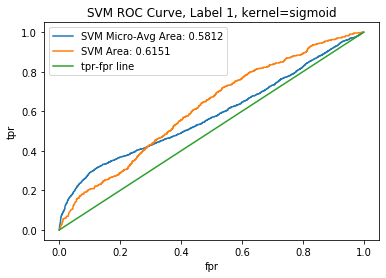

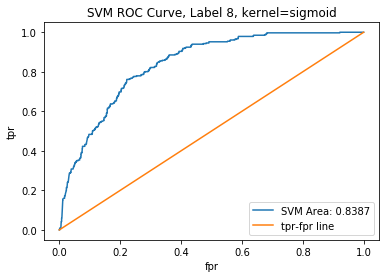

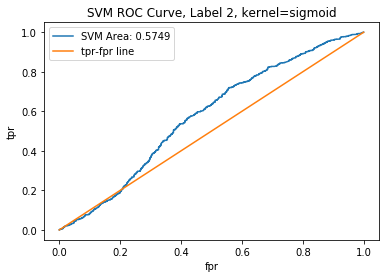

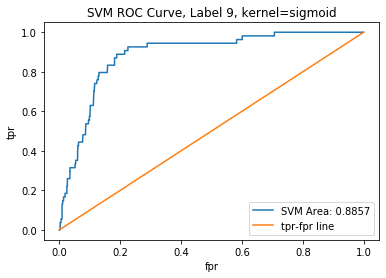

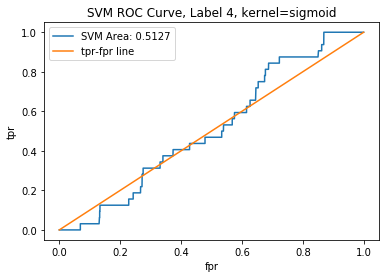

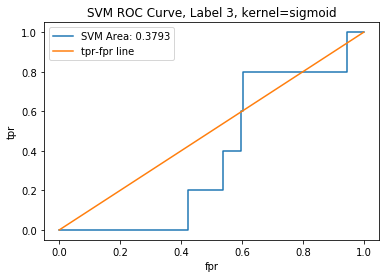

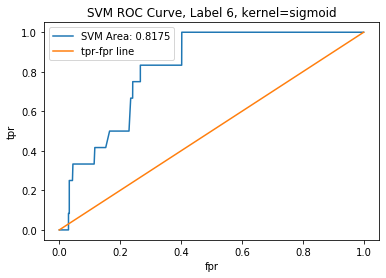

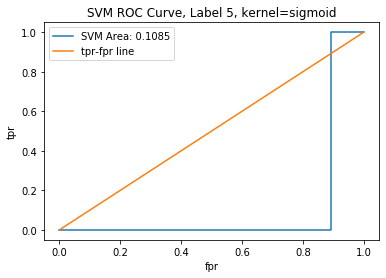

In [168]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train3, y_train3, X_test3, y_test3)

## Dataset 4

In [169]:
printShapes(X_train4=X_train4.shape, X_test4=X_test4.shape, y_train4=y_train4.shape)

printHeads(X_train4=X_train4.head(), X_test4=X_test4.head(), y_train4=y_train4.head())

X_train4 Shape: (2547, 112)

X_test4 Shape: (1092, 112)

y_train4 Shape: (2547, 1)

X_train4 Head:        0        1        2         3         4         5        6         7    \
0 -0.44987 -0.20049 -0.48729 -0.061085 -0.051024 -0.021653  0.30788 -0.057097   
1 -0.52843 -0.25912 -0.42584 -0.061339 -0.075853 -0.027442  0.30166 -0.064007   
2 -0.49823 -0.26346 -0.40683 -0.050683 -0.066742 -0.024397  0.27500 -0.130610   
3 -0.42405 -0.18392 -0.33761 -0.035511 -0.048362 -0.008383  0.23487 -0.197570   
4 -0.21487 -0.24508 -0.25204 -0.111790 -0.045751 -0.035225  0.21666 -0.216510   

        8        9    ...       102       103     104     105     106     107  \
0 -0.015610  0.13241  ...    4.5912   23.2100  146.23 -178.08  152.01 -129.72   
1 -0.042905  0.33057  ...    9.7736   -4.6825  103.02 -182.73  168.97 -151.29   
2 -0.105670  0.28596  ...   38.8230  -53.3400  161.33 -180.05  151.52 -127.85   
3 -0.075233  0.13323  ...   81.5990  -93.0770  145.09  172.44 -196.78 -135.79   
4 -0.0852

In [170]:
X_test4.tail()

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
1087,-0.042106,-0.060041,-0.052885,-0.066470,-0.046249,-0.080368,0.039437,-0.37812,-0.30987,0.070089,...,171.26,-177.65,175.35,141.95,-145.25,195.870,-220.17,203.51,-185.19,190.42
1088,-0.075579,-0.057300,-0.054729,-0.098470,-0.094048,-0.067433,0.001865,-0.38659,-0.29077,0.085219,...,175.34,-195.36,180.89,158.21,-215.23,-84.344,105.40,205.39,-191.70,195.67
1089,-0.046965,-0.070540,-0.058407,-0.105140,-0.128010,-0.080368,0.009211,-0.38623,-0.30120,0.101070,...,189.89,-205.38,186.58,172.02,-139.57,105.950,-142.26,143.56,-125.91,178.52
1090,-0.053778,-0.025624,-0.049878,-0.093137,-0.107260,-0.051512,0.025017,-0.39009,-0.29406,0.078960,...,183.00,-176.71,184.49,145.63,-141.06,211.050,-204.05,184.96,-204.15,188.35
1091,-0.086850,-0.088063,-0.104710,-0.145800,-0.158830,-0.080368,0.036635,-0.39016,-0.32705,0.089560,...,198.30,-221.31,188.51,184.50,-221.56,197.830,-179.47,167.73,-140.18,172.17


In [179]:
# X_train4_cmp, X_test4_cmp = trainPCA(X_train4, X_test4)

In [180]:
# printShapes(X_train4_cmp=X_train4_cmp.shape, X_test4_cmp=X_test4_cmp.shape)

## KNN for DS4

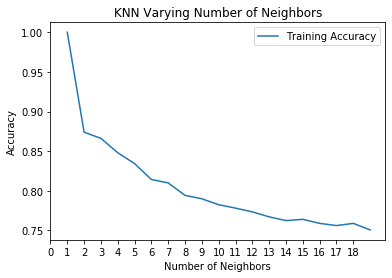

In [181]:
neighbors4, train_accuracy4 = testK(X_train4, y_train4)
plotTestK(neighbors4, train_accuracy4)

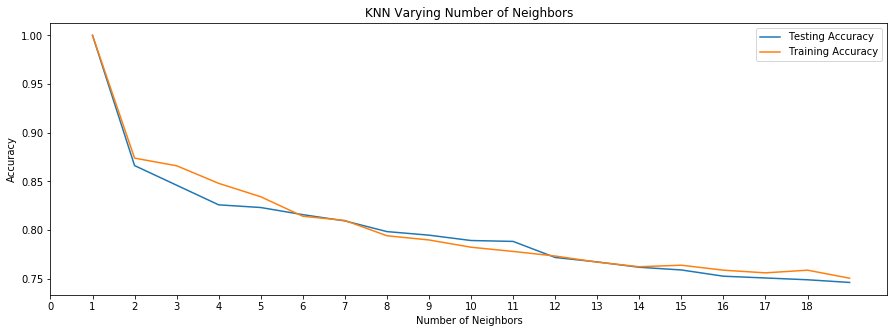

In [184]:
y_test4 = getTestLabelsKNN(1, X_train4, y_train4, X_test4)
n4, test_acc4, train_acc4 = optimizeK(X_train4, y_train4, X_test4, y_test4, 20)
plotK(n4, test_acc4, train_acc4, [15, 5])

In [185]:
knn_score4, knn_y_pred4 = runKNN(5, X_train4, y_train4, X_test4, y_test4)
print(f'Accuracy: {knn_score4}')

Accuracy: 0.8232600732600732


In [186]:
knn_keys4, knn_vals4, knn_labels4 = countUniqueValues(knn_y_pred4)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 8, 7, 9])
Values: dict_values([115, 134, 142, 120, 106, 123, 123, 122, 107])
Labels: [1, 2, 3, 4, 5, 6, 8, 7, 9]


KNN Accuracy Score, k=5: 0.8232600732600732

KNN Confusion Matrix, k=5

[[ 93   9   2  12   0   1   1   1   0]
 [  5 107   9   2   2   0   1   0   0]
 [  5   9 116   2   3   3   0   0   2]
 [  7   4   6  97   9   0   0   0   1]
 [  1   3   3   5  75  12   0   0   0]
 [  1   0   1   0  14 101   6   0   1]
 [  1   0   1   1   0   2 105   8   4]
 [  1   0   2   0   0   0   3 109   3]
 [  1   2   2   1   3   4   6   5  96]]

		  KNN Classification Report, k=5

              precision    recall  f1-score   support

           1       0.81      0.78      0.79       119
           2       0.80      0.85      0.82       126
           3       0.82      0.83      0.82       140
           4       0.81      0.78      0.80       124
           5       0.71      0.76      0.73        99
           6       0.82      0.81      0.82       124
           7       0.86      0.86      0.86       122
           8       0.89      0.92      0.90       118
           9       0.90      0.80      0.85       12

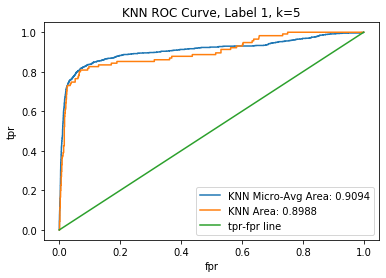

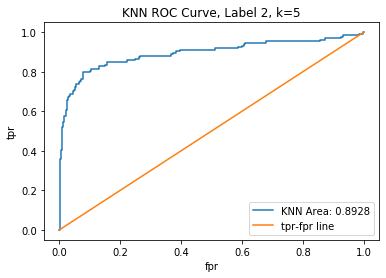

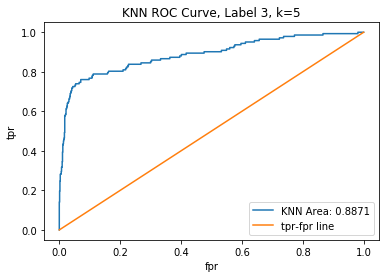

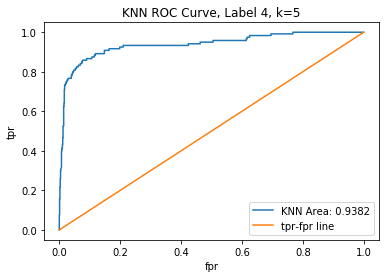

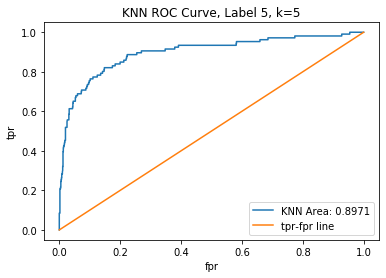

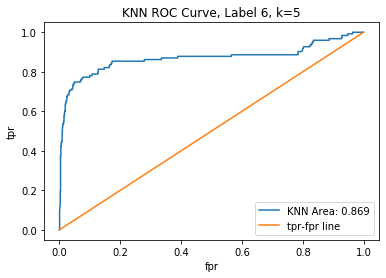

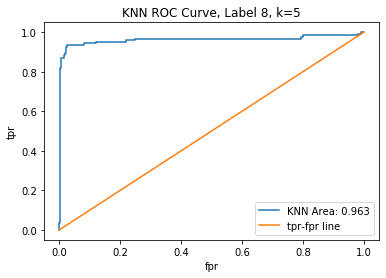

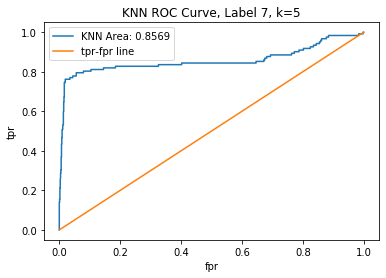

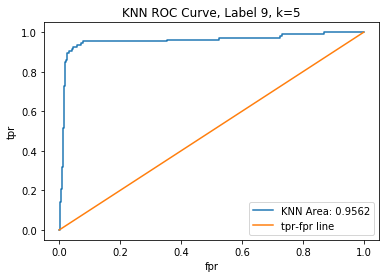

In [189]:
n_neighbors4=5
getScoresKNN(n_neighbors4, y_test4, knn_y_pred4)
pd.crosstab(y_test4, knn_y_pred4, rownames=['True'], colnames=['Predicted'], margins=True)
calcMultiClassROCAUC(X_train4, y_train4, X_test4, knn_y_pred4, model='KNN', tuner='k',\
 tuner_val=n_neighbors4, labels=knn_labels4, dec=False)

## LR for DS4

In [194]:
c4 = 20
lr_cma4, lr_cr4, lr_acc4, lr_y_pred4, ky4, val4 = runLogisticRegression(c4, X_train4, y_train4, X_test4, y_test4)
print(f'Logistic Regression Highest Accuracy Score, C={ky4}: {val4}\n')
print(f'Logistic Regression Most Accurate Confusion Matrix\n\n{lr_cma4[ky4]}\n')

Logistic Regression Highest Accuracy Score, C=3: 0.6282051282051282

Logistic Regression Most Accurate Confusion Matrix

[[59 17 10 11  1  3  1 10  7]
 [19 68 16  2  3  6  4  1  7]
 [ 7  9 92  8  5  9  5  2  3]
 [11  3  4 89  6  1  3  2  5]
 [ 3  5  6  5 60 13  1  3  3]
 [ 1  4 11  1 18 76  7  2  4]
 [ 4  2  1  1  3  6 84 12  9]
 [ 3  3  3  0  6  2 13 78 10]
 [ 1  2  4  2  0  6  4 21 80]]



In [195]:
pd.crosstab(y_test4, lr_y_pred4[ky4], rownames=['True'], colnames=['Predicted'], margins=True)
print(f'\n\t   Logistic Regression Classification Report C={ky4}\n\n{lr_cr4[ky4]}')


	   Logistic Regression Classification Report C=3

              precision    recall  f1-score   support

           1       0.55      0.50      0.52       119
           2       0.60      0.54      0.57       126
           3       0.63      0.66      0.64       140
           4       0.75      0.72      0.73       124
           5       0.59      0.61      0.60        99
           6       0.62      0.61      0.62       124
           7       0.69      0.69      0.69       122
           8       0.60      0.66      0.63       118
           9       0.62      0.67      0.65       120

    accuracy                           0.63      1092
   macro avg       0.63      0.63      0.63      1092
weighted avg       0.63      0.63      0.63      1092



In [192]:
lr_keys4, lr_vals4, lr_labels4 = countUniqueValues(lr_y_pred4)

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
Values: dict_values([array([1, 1, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 6, 9, ..., 8, 1, 2]), array([1, 1, 9, ..., 8, 1, 2])])
Labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


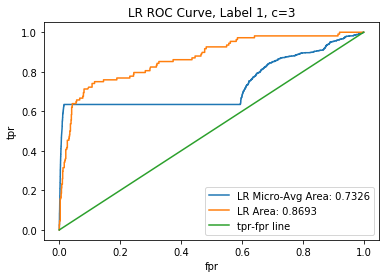

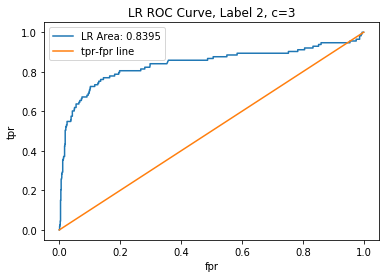

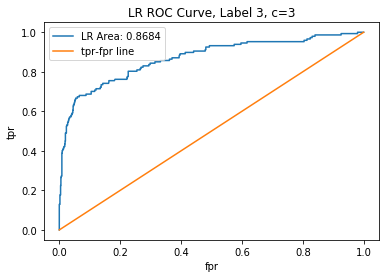

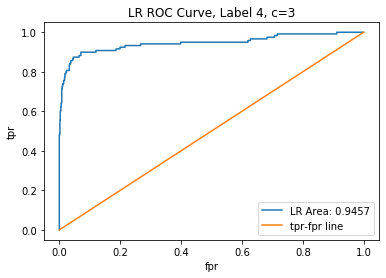

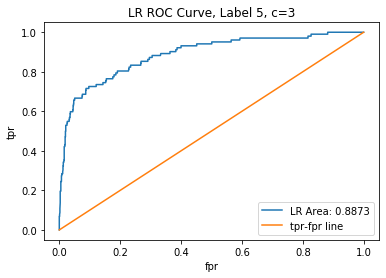

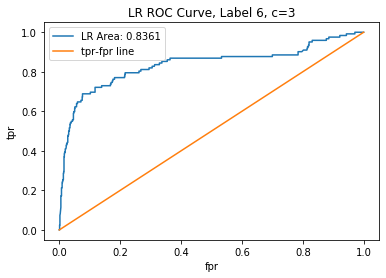

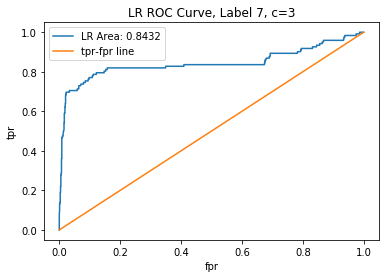

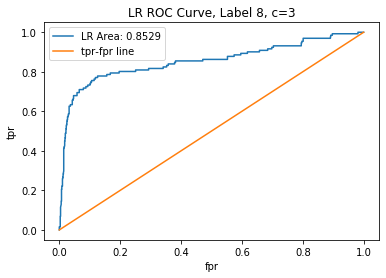

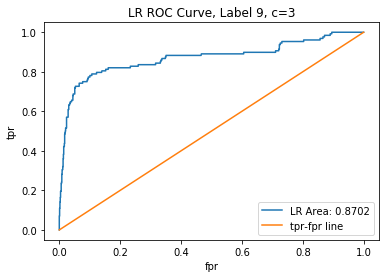

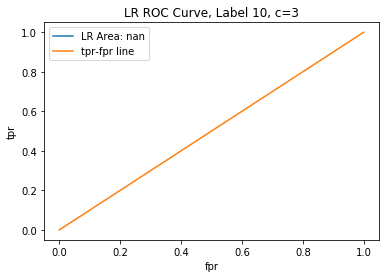

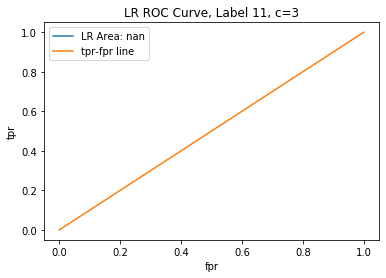

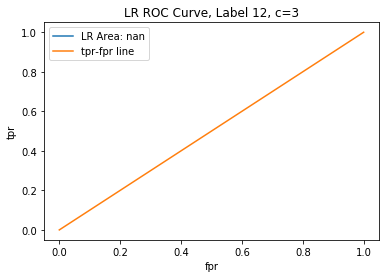

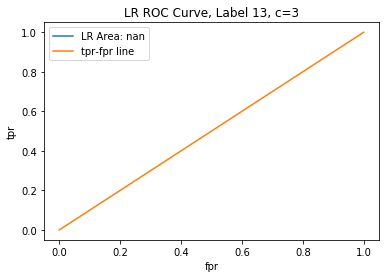

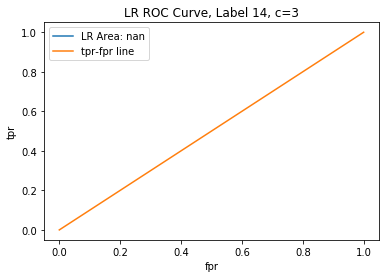

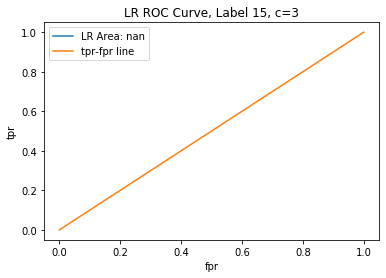

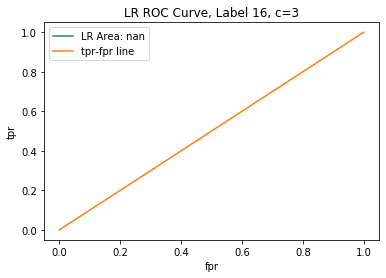

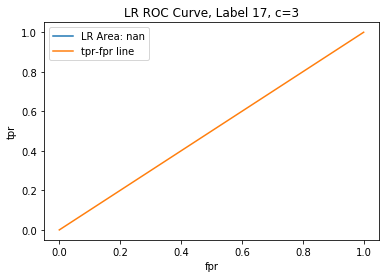

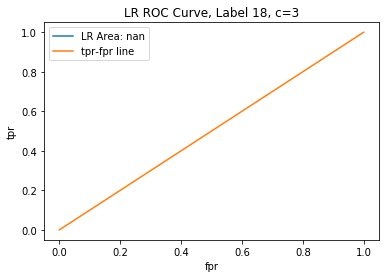

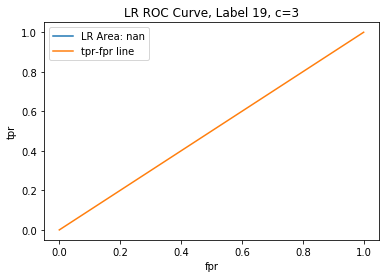

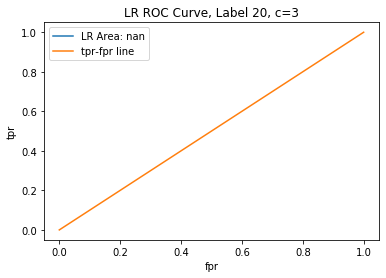

In [197]:
calcMultiClassROCAUC(X_train4, y_train4, X_test4, lr_y_pred4[ky4], model='LR', tuner='c', tuner_val=ky4, labels=lr_labels4, dec=False)

## Random Forest for DS4

Keys: dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])
Values: dict_values([116, 123, 137, 121, 116, 121, 117, 112, 129])
Labels: [1, 2, 3, 4, 5, 6, 7, 8, 9]

Random Forest Accuracy Score: 0.76007326007326

Random Forest Confusion Matrix

[[ 94   7   3  10   0   1   1   1   2]
 [  9  90  14   4   3   1   1   0   4]
 [  4  12 104   3  13   1   2   0   1]
 [  8   5   6  94   7   2   1   0   1]
 [  0   3   4   5  65  20   1   1   0]
 [  0   2   3   0  25  84   3   0   7]
 [  1   2   0   1   1   7  95   6   9]
 [  0   1   2   1   0   1   8 102   3]
 [  0   1   1   3   2   4   5   2 102]]


		Random Forest Classification Report

              precision    recall  f1-score   support

           1       0.81      0.79      0.80       119
           2       0.73      0.71      0.72       126
           3       0.76      0.74      0.75       140
           4       0.78      0.76      0.77       124
           5       0.56      0.66      0.60        99
           6       0.69      0.68      0.69       124

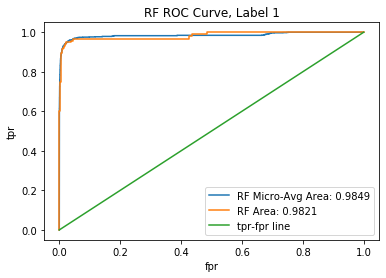

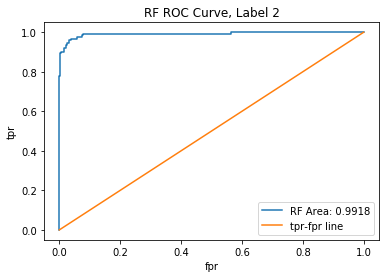

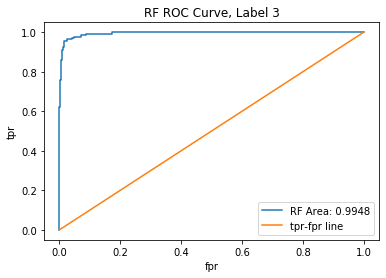

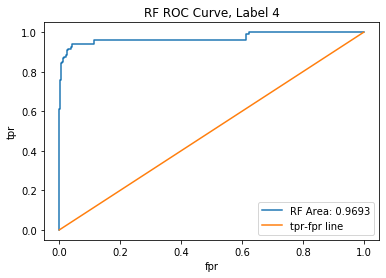

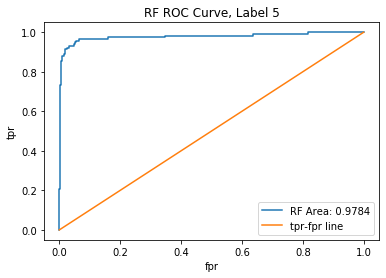

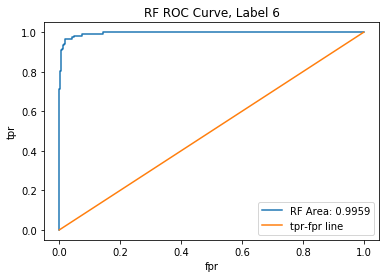

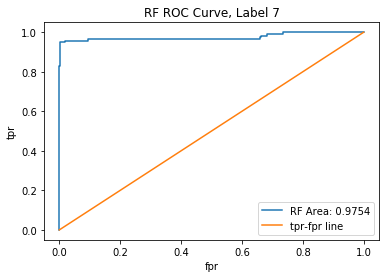

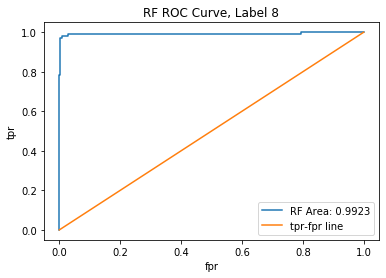

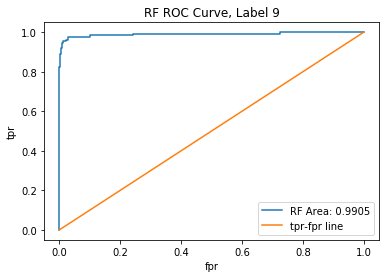

In [199]:
runRandomForest(X_train4, y_train4, X_test4, y_test4)

## SVM for DS4

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for k in kernels:
    print(f'SVM {k} Kernel results\n_________________________________________')
    runSVM(k, X_train4_cmp, y_train4, X_test4_cmp, y_test4)

SVM linear Kernel results
_________________________________________


## Dataset 5

In [ ]:
printShapes(X_train4=X_train4.shape, X_test4=X_test4.shape, y_train4=y_train4.shape)

printHeads(X_train4=X_train4.head(), X_test4=X_test4.head(), y_train4=y_train4.head())